In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
bool_map = {
  True: 1,
  False: 0
}

data["CryoSleep"] = data["CryoSleep"].map(bool_map)
data["VIP"] = data["VIP"].map(bool_map)
data[["Deck", "Num", "Side"]] = data["Cabin"].str.split("/", expand=True)

data["Num"] = data["Num"].fillna("0")
data["Num"] = data["Num"].astype(int)

data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


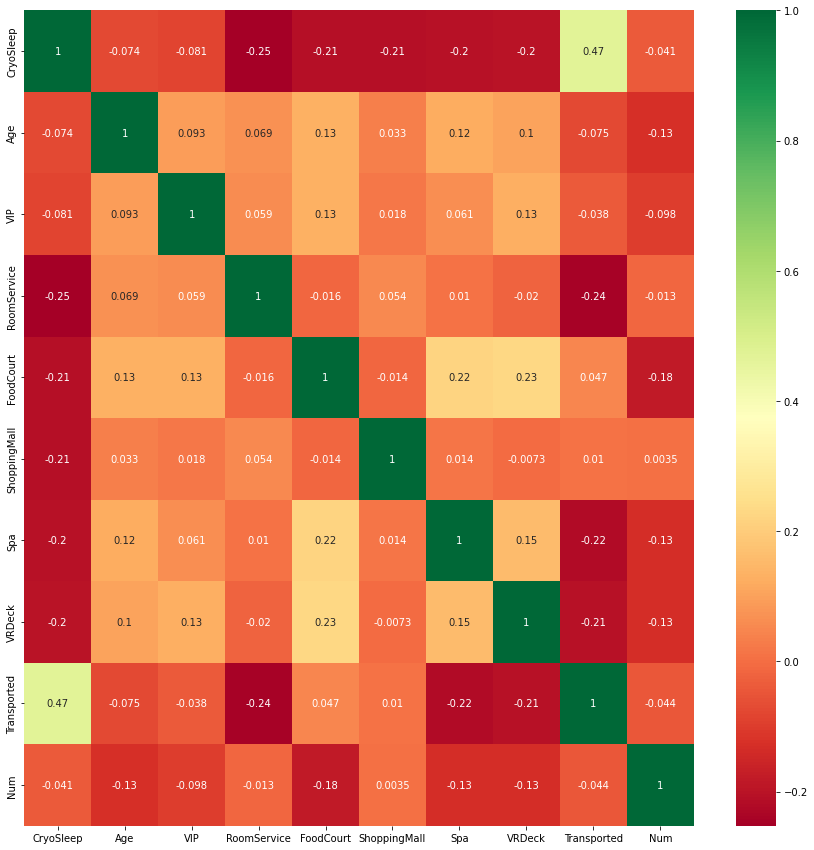

In [12]:
def correlation(data):
  corrmat = data.corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(15,15))
  g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

correlation(data)

In [49]:
cols = ["HomePlanet", "Cabin", "Destination"]

for col in cols:
  print(data[col].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [50]:
home_planets = ["Earth", "Europa", "Mars"]
destinations = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"]

for planet in home_planets:
  for dest in destinations:
    data_slice = data[(data["HomePlanet"] == planet) & (data["Destination"] == dest)]
    print(planet + "   " + dest + "   " + str(data_slice["Transported"].sum() / len(data_slice)))

Earth   TRAPPIST-1e   0.38922928087713643
Earth   55 Cancri e   0.5043478260869565
Earth   PSO J318.5-22   0.49859550561797755
Europa   TRAPPIST-1e   0.6349873843566022
Europa   55 Cancri e   0.6896162528216704
Europa   PSO J318.5-22   0.7368421052631579
Mars   TRAPPIST-1e   0.511864406779661
Mars   55 Cancri e   0.6113989637305699
Mars   PSO J318.5-22   0.4489795918367347


In [51]:
cabin_first_letters = []
cabin_last_letters = []

for cabin in data["Cabin"]:
  cabin = str(cabin)
  if cabin.count("/") == 2:
    txt = cabin.split("/")
    cabin_first_letters.append(txt[0])
    cabin_last_letters.append(txt[2])

cabin_first_letters = pd.Series(cabin_first_letters)
cabin_last_letters = pd.Series(cabin_last_letters)

first_letters_set = set(cabin_first_letters)
last_letters_set = set(cabin_last_letters)

print(cabin_first_letters.value_counts())
print(cabin_last_letters.value_counts())

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
dtype: int64
S    4288
P    4206
dtype: int64


In [52]:
data["Cabin"].fillna("0", inplace=True)

In [53]:
for first_letter in first_letters_set:
  for last_letter in last_letters_set:
    data_slice = data[(data["Cabin"].astype(str).str[0] == first_letter) & (data["Cabin"].astype(str).str[-1] == last_letter)]
    print(first_letter + "   " + last_letter + "   " + str(data_slice["Transported"].sum() / len(data_slice)))

T   S   0.0
T   P   0.25
D   S   0.4652173913043478
D   P   0.4032258064516129
F   S   0.47050147492625366
F   P   0.4109874826147427
B   S   0.784037558685446
B   P   0.6742209631728046
G   S   0.5837879968823071
G   P   0.4482758620689655
A   S   0.5467625899280576
A   P   0.4358974358974359
C   S   0.7635467980295566
C   P   0.5806451612903226
E   S   0.3713646532438479
E   P   0.34265734265734266


In [54]:
no_cabin = data[data["Cabin"] == "0"]

print(no_cabin["Transported"].sum() / len(no_cabin))

0.5025125628140703


In [55]:
cols_with_nans = []

def count_nans(data):
  for col in data.columns:
    nans = data[col].isna().sum()
    if nans > 0:
      print(col + "    " + str(nans))
      cols_with_nans.append(col)

count_nans(data)

HomePlanet    201
CryoSleep    217
Destination    182
Age    179
VIP    203
RoomService    181
FoodCourt    183
ShoppingMall    208
Spa    183
VRDeck    188
Name    200


In [59]:
for col in cols_with_nans:
  data_slice = data[data[col].isna()]
  print(col + "   " + str(data_slice["Transported"].sum() / len(data_slice)))

HomePlanet   0.5124378109452736
CryoSleep   0.48847926267281105
Destination   0.5054945054945055
Age   0.5027932960893855
VIP   0.5123152709359606
RoomService   0.4585635359116022
FoodCourt   0.5409836065573771
ShoppingMall   0.5480769230769231
Spa   0.4972677595628415
VRDeck   0.5212765957446809
Name   0.505


In [61]:
for col in cols_with_nans:
  data_slice = data[data[col].isna()]
  print(col + "   " + str(data_slice.isna().sum().sum() / len(data_slice)))

# rows with missing values seem to have only slightly over 1 missing value on average

HomePlanet   1.1840796019900497
CryoSleep   1.2258064516129032
Destination   1.2087912087912087
Age   1.1620111731843576
VIP   1.1773399014778325
RoomService   1.1546961325966851
FoodCourt   1.2131147540983607
ShoppingMall   1.2211538461538463
Spa   1.180327868852459
VRDeck   1.1914893617021276
Name   1.225
